In [24]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [34]:
adata_loc = "/project2/gilad/jpopp/ebQTL/data/single_cell_objects/eb_pflog1ppfnorm.hvg.umap_embedding.h5ad"
celltype_labels_tsv = "/project2/gilad/jpopp/ebQTL/data/fca/eb_cellid_labels.with_ipsc.tsv"

In [4]:
adata = sc.read_h5ad(adata_loc)

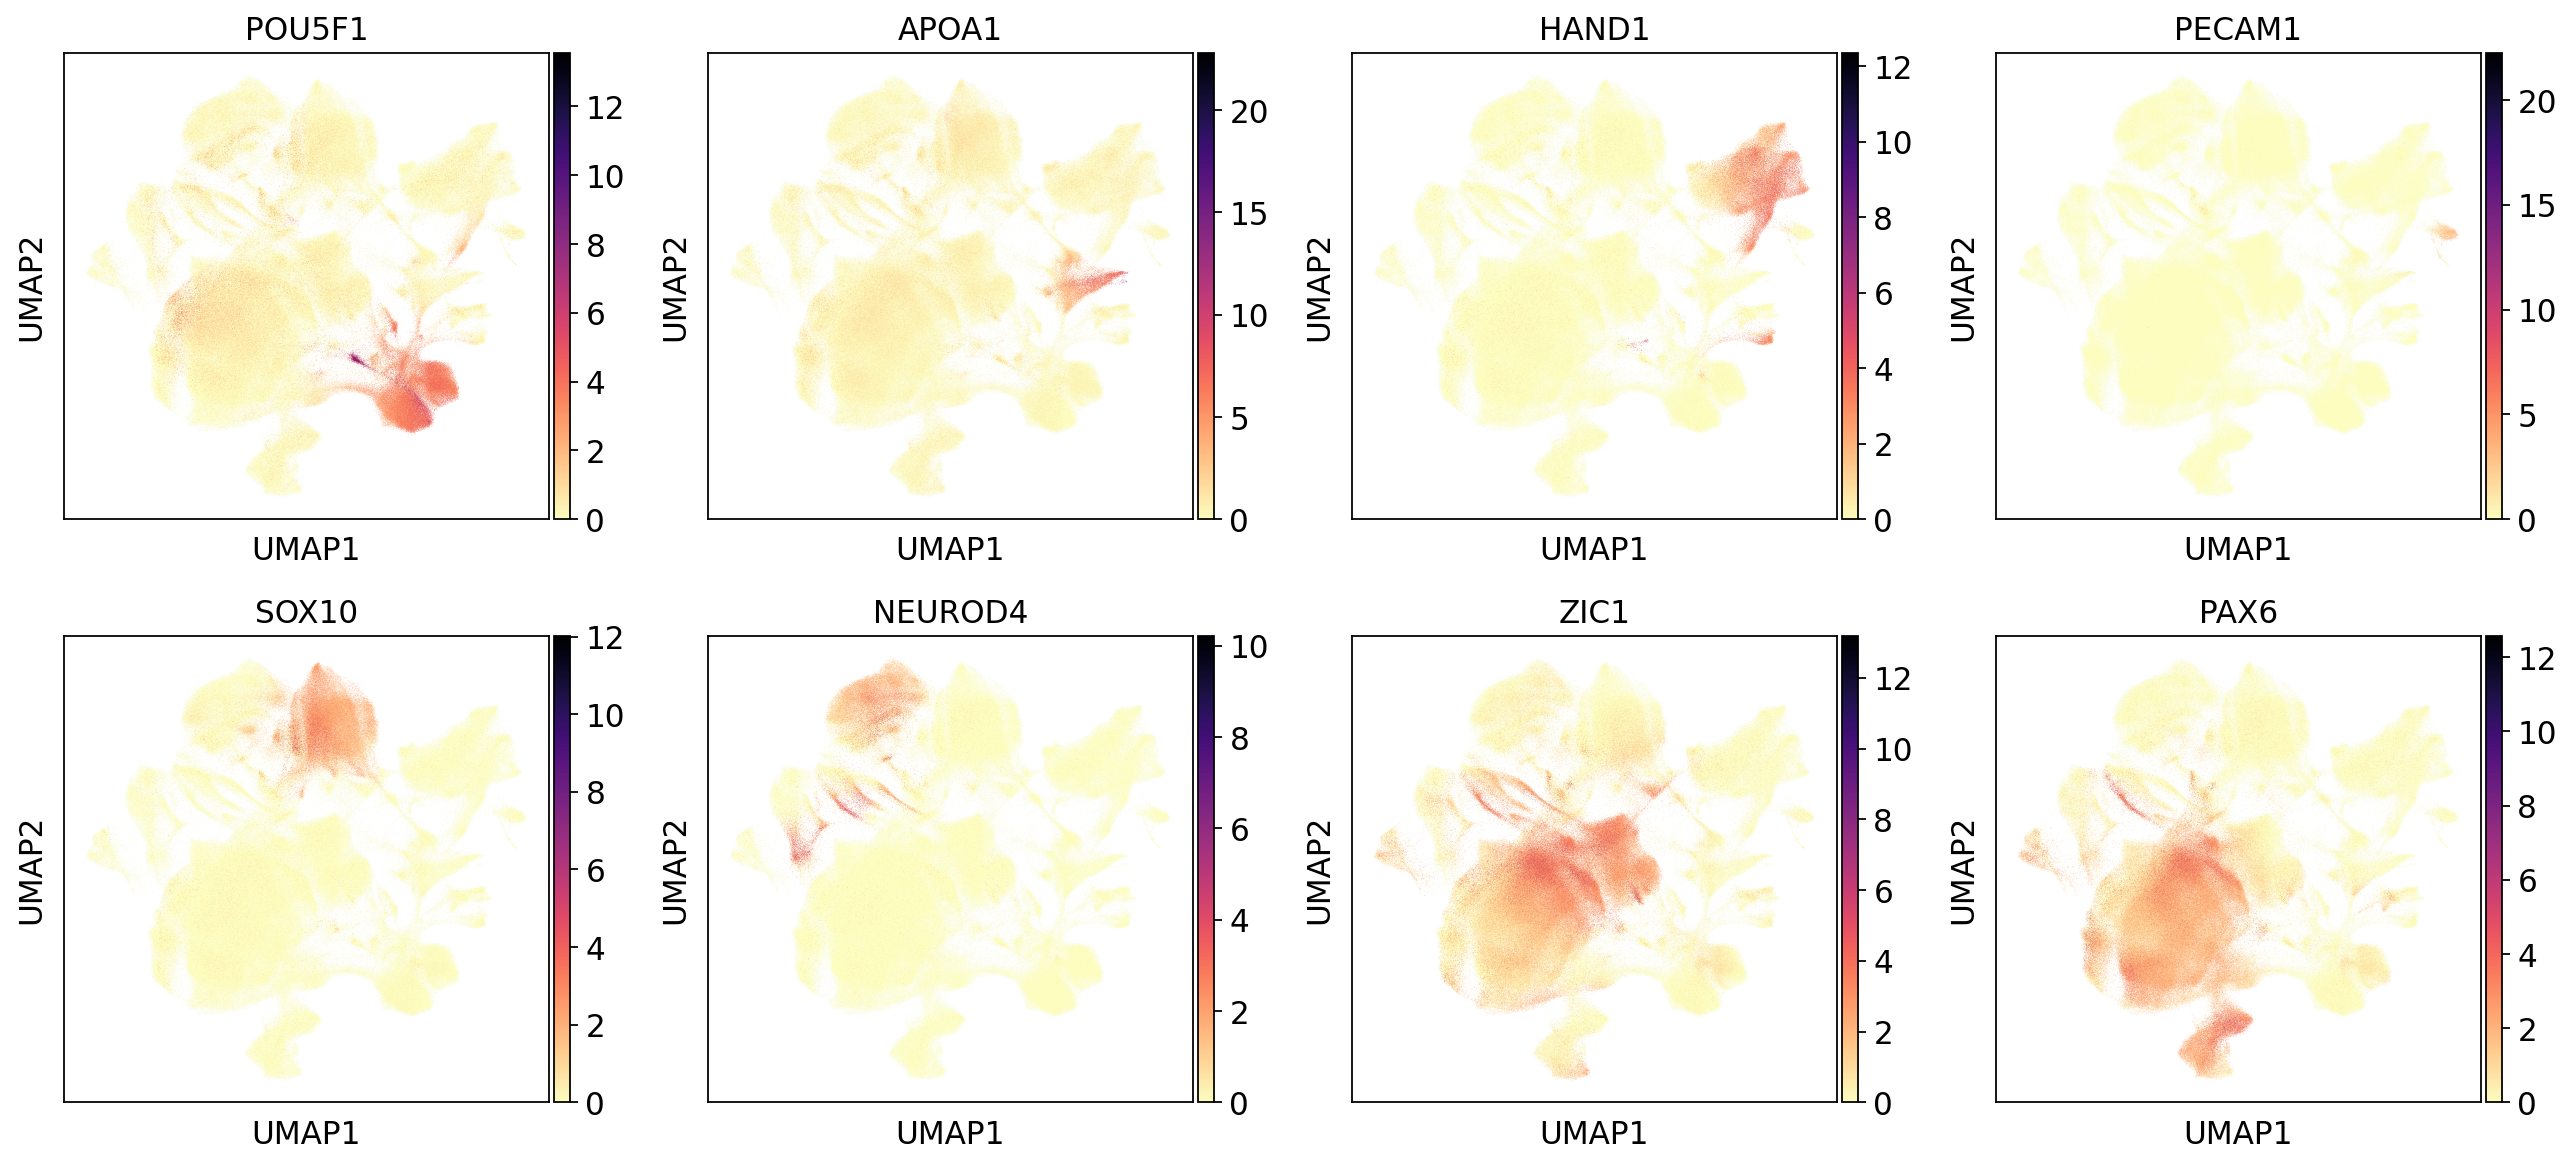

In [29]:
sc.pl.umap(adata, color=['POU5F1', 'APOA1', 'HAND1', 'PECAM1', 'SOX10', 'NEUROD4', 'ZIC1', 'PAX6'],
          color_map='magma_r')

In [51]:
celltype_labels = pd.read_csv(celltype_labels_tsv, sep="\t").set_index("cell").rename(columns={'value': 'celltype'})

In [52]:
adata.obs = adata.obs.merge(celltype_labels, how='outer', left_index=True, right_index=True)

In [60]:
adata.X = adata.layers['log1pPF']

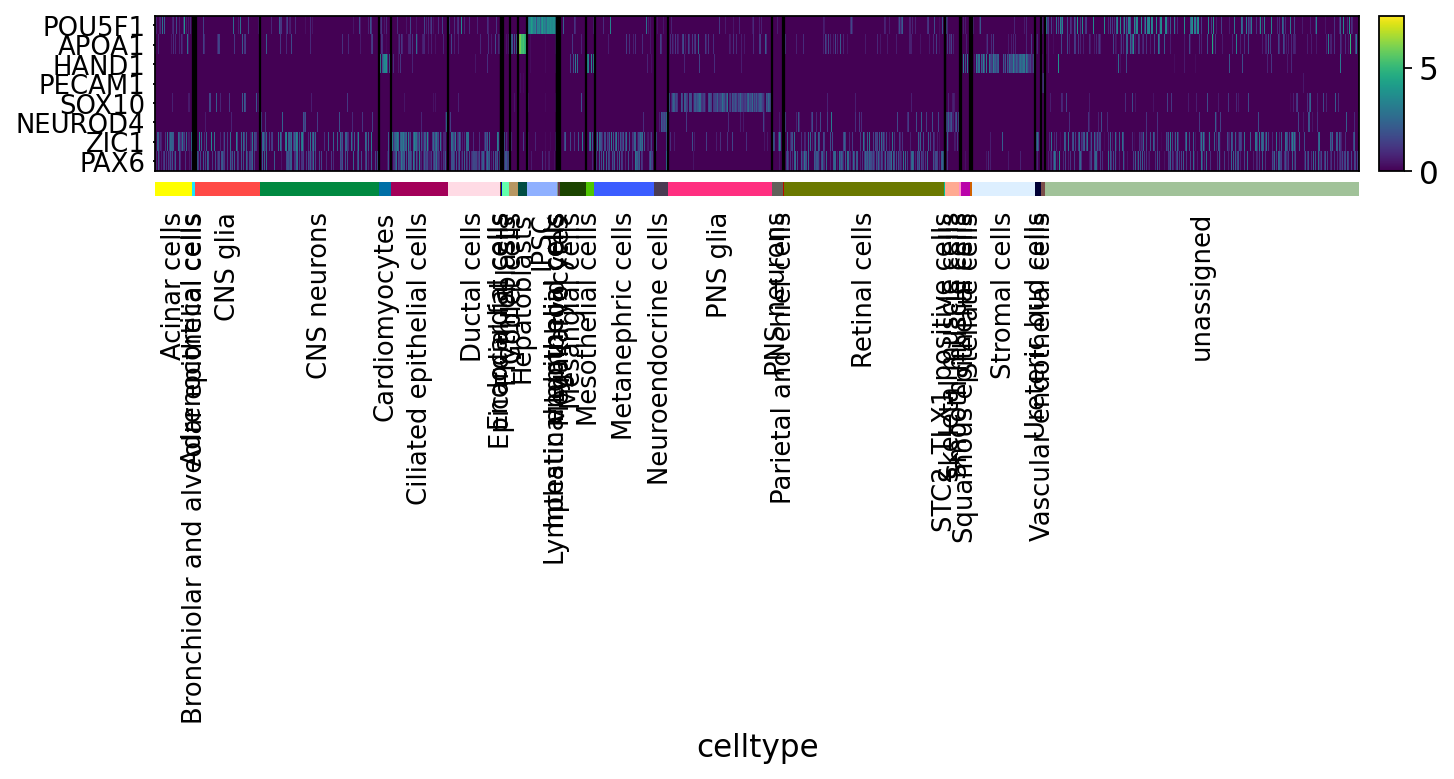

In [63]:
sc.pl.heatmap(adata, var_names=['POU5F1', 'APOA1', 'HAND1', 'PECAM1', 'SOX10', 'NEUROD4', 'ZIC1', 'PAX6'],
              groupby='celltype', swap_axes=True)

In [55]:
adata

AnnData object with n_obs × n_vars = 909536 × 5000
    obs: 'sample_id', 'Collection.Date', 'Lane', 'Sample_ID', 'cDNA.amp.cycles', 'cDNA.total.yield', 'library_prep_batch', 'Sequencing_batch', 'col_group', 'donor_id', 'prob_max', 'prob_doublet', 'n_vars', 'best_singlet', 'best_doublet', 'doublet_logLikRatio', 'Line.True', 'Line.StockLabel', 'contaminated', 'swapped', 'Feeder.passage', 'Feeder.Free.passage', 'sex', 'Formation.replicate', 'collection.replicate', 'formation.date', 'visual.confluence', 'total.cells.per.lane..correct.', 'X..Viable..based.on.average.of.two.counts.', 'days.maintained.in.LD.prior.to.formation', 'who.dissociated.the.lines.for.formation', 'cell.counter.correction', 'comments', 'collection.date', 'collection.group.label', 'EB.appearance.notes', 'dissociated.by.', 'approx..time.in.accumax..in.minutes.', 'leiden_coarse', 'sizeFactor', 'scranGroup', 'scranCluster', '_scvi_batch', '_scvi_labels', 'leiden', 'value', 'celltype'
    var: 'gene_ids', 'feature_types', 'h